# **Machine Learning and Vision for Front Load Trucks in Waste Management System**

# **Problem Statement**

Currently the garbage collection trucks are collecting the waste bins located across the cities with human assistance and manual interventions. However, it is impractical for the management to verify the accuracy of the executed data in terms of number of actual bins collected from the reports that is submitted by the truck operators to management upon completion of their daily work. 
Due to this, Waste management organizations are spending a lot of time and money in human resources, besides knowing the fact that it creates the room for malpractices. Inaccurate data creates grievance/complaints from the customers claiming that there is no service is done to them. 


# **Contributing factors to Problem Statement**
### **Reasons behind malpractices from customer perspective**
A customer is charged in 3 ways:

•	Rental of a bin.

•	A per lift/tip service.

•	Approximate weight disposed at the landfill.

### **Reasons behind why inccurate data is produced from truck operators**
•	Moving the bin out of the way to get to a bin behind it.

•	Relocating a bin to a different location on the same site.

•	Lifting it for a plow to clear snow that has fallen in the area.

•	Driver spots material that is not allowed in the bin or load is contaminated.

These aspects create room for malpractices that results in Bad Lift/No lift/Incomplete Lift. To avoid this we need to have a lift detection technique to produce accuarate results.






# **Project Goal**

Goal of this project is to detect and report the incidents of interest recorded by cameras that are mounted on front load trucks during the process of garbage collection using Machine Learning and Machine Vision tools.




# **Objectives**

	To conduct background studies on 

1. Various waste collection processes, 

2. Waste management system, 

3. Applied AI concepts in real world waste management process improvements.

	To assess the current problems that AI is facing in waste management process improvements and the possible solutions to overcome the problems.

	To identify the potential ethical concerns related to the Data storage and usage.

	To explore the images required to solve the business problem along with the number of images, their structure & sequence.

	To study the external environment issues that potentially impact the desired outcomes (It may include unexpected scenarios like weather, snow, animals, movement of people and such).

	To identify the right machine learning algorithm that fits to our business problem.

	To build the machine learning algorithm that performs feature extraction, classification with training of images in sequence and their testing.

	To evaluate the performance of the machine learning algorithm.

	To optimize the model with fine tuning.

	To create final project report and the presentation.


# **Metrics**

•	Literature review: Reviewing of some articles and research papers to have clear understanding of background work relating to our business problem.

•	Disk Memory for data storage,RAM for execution, Data Dimensions during Extract, Transformation and Load process.

•	Cleaned Data: Elimination of Noisy data to feed into the algorithm.

•	Shortlisting the Algorithm with the ability to explain analytical reasoning.

•	Feature Extract- Classify- test accuarcy (Number neurons, hidden layers, dense layers, drop out layers, decay rate, learning rate, weight initiation, activation functions, batch size and number of epochs).

•	Confusion matrix, Accuracy Score, Recall Score, Precision Score, F1 Score, ROC curve. Overfitting/Underfitting, Regularization.

•	Adaptive learning rate, optimization techniques.

•	Content, Grammar, explanation, completeness, correctness, clarity, organized and structured report.


# **Project Pipeline Process**

### **1. Data Collection and Review**
### **2. Data Preprocessing**
### **3. Building the Model**
### **4. Training the Model**
### **5. Model Evaluation**
### **6. Fine Tuning**
### **7. Prediction**


## **Load required libraries**

In [ ]:
import os                          # To interact with Operating System such as creating and deleting directory and fetching its contect and so on. 
from os import path                # To specify the file path so that we can retrive the data present in the directory through specified path.
from pathlib import Path           # To read a file path as object instead of string so that it makes it easy during the data manipulation
import glob                        # to retreive the path of the folder/ files that matches the specific pattern
import cv2                         # OpenCV module that helps to use all the funtionalities of the OpenCV library
import math                        # helps to use mathematical functions
import random                      # to make sure that computer picks any random value, in this case it is any random sequence of images at a time stamp. 
import numpy as np                 # numerical python library to work with numerics
import pandas as pd                # python library to work with data frames
import datetime as dt              # date functions library to work with time stamps of the captured image
import tensorflow as tf            # to perform Deep Learning architecture in python using tensorflow 
import matplotlib.pyplot as plt    # to visualize the images using mathplotlib library
import matplotlib.image as mpimg   # to visualize the images
from pandas import Timestamp       # to work on timestamp

# to display the images in this notebook
%matplotlib inline                                                          
from tensorflow.keras.preprocessing.image import load_img, img_to_array     # openCV functions to read and to convert the image into array
import keras                                                                # importing keras API 
from tensorflow.keras.utils import Sequence                                 # to work with sequence image
from sklearn.model_selection import train_test_split                        # to split the images into number of training, validating and testing sets
from tensorflow.keras.models import Sequential                              # to build the Sequential model architecture
from tensorflow.keras.layers import *                                       # to add the layers for the model
from tensorflow.keras.utils import to_categorical                           # to convert the vector into matrix 
from tensorflow.keras.callbacks import EarlyStopping,ReduceLROnPlateau      # to identify the number of epochs required to minimize the loss
from tensorflow.keras.utils import plot_model                               # To visuliaze the plots generated from the model
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping       # Model training monitor functions
import sklearn.metrics as metrics                                           # Metrices
from sklearn.metrics import classification_report                           #To generate the classification report
import seaborn as sns                                                       # visualization of confusion matrix with the help of heatmap
from sklearn.metrics import confusion_matrix                                #to visulize the Metrices of confusion matrix
from sklearn.metrics import accuracy_score                                  # accuracy score
from keras.layers import Dense, LSTM, Flatten, TimeDistributed, Conv2D,Conv3D, Dropout,MaxPooling2D,GlobalAveragePooling3D,MaxPooling3D,BatchNormalization # Model Architecture layers


## **Connecting to the Colab Drive and Unzipping the uploaded files**


In [ ]:
path = "/content"
os.chdir(path)

In [ ]:
#First the above cells, then upload the "Data Set-20220716T030739Z-001.zip" to the colab drive.
# make sure you have google colab higher version since it has more than 14000 images.

#Once the file is uploaded, run the below cell by removing the comment tag (# tag), you may have to re '#' tag it, once you you are done with unzipping the image files.


In [ ]:
#!unzip "Data Set-20220716T030739Z-001.zip"

# **1. Data Collection and Review**

Necessary dataset to train the machine learning algorithm is given by Metrics Masters Ltd. It consists of realtime images taken from the cameras mounted on the front side of the trucks.
Review of continuous dataset has brought in the need to define the 3rd label as no activtiy when activity doesn't happen.

1. We are having one jason File for speed of the vehicle being collected using the GPS system of the vehicle.

2. The data set consists of around 20000 images with sequences

  (A). Sequence of images represent **True lifts** ,**False Lifts** and **No Lifts** with thier **time-stamps** recorded at every 3 seconds during the process of garbage bin collection.

  (B). These **True Lifts** ,**False Lifts** and **No Lifts** are stored in **three diffrent folders**.

3. Continous Running Time dataset for 4 hours with approximately 6000 images 

#**2. Data Preprocessing**
## **Training Data Preprocessing**

# Setting the Current Working Directory and display the class labels

In [ ]:
# Check on current working directory
print(os.getcwd())

# Specify the path of the desired directory and make it as the current working directory
path ='/content/Data Set/train/' 
os.chdir(path)

# Check on current working directory
print(os.getcwd())

# Assign the path of the current working directory to the folders having classes
p = Path().cwd()

# Retreive the class names/class of incidents present in that directory using the specified path
labels = os.listdir(p)
print(labels)

/content
/content/Data Set/train
['Bad Incidents Data Set', 'No Activity Data Set', 'Good Incidents Data Set']


# **Creation of dictionary and lists**
# Dictionary for retrieving labels
# Lists for holding images


In [ ]:
# Define target dictionary to fetch the labels and map them to '1' and '0'.
label_dict = {
  "Bad Incidents Data Set": 0,
  "Good Incidents Data Set": 1,
  "No Activity Data Set":2
}
# define a empty list to store the sequence of images
print(label_dict)
incident_seq_images_data = []  #to store the final sequence of images in the form of array after reading them

{'Bad Incidents Data Set': 0, 'Good Incidents Data Set': 1, 'No Activity Data Set': 2}


## **Specify the input dimensions**


In [ ]:
# Specify the height and width to which each image to resized in our dataset.
IMAGE_HEIGHT, IMAGE_WIDTH, num_channels = 112, 112,3

# Specify the number of images in a incident that will be fed to the model as one sequence.
SEQUENCE_LENGTH = 100


### Generate the zero image(black)

In [ ]:
# generating a black image to pad to the sequence if it is necessary:

from PIL import Image
import numpy as np
img_zero = np.zeros((IMAGE_HEIGHT,IMAGE_WIDTH,num_channels),dtype=np.uint8)
img_zero[0:256, 0:256]= [0, 0, 0]
img_pad=Image.fromarray(img_zero)
image_pad = img_to_array(img_pad)   #convert the image into an array
normalized_img_pad = image_pad/255  #Normalise the image array values between 0's and 1's
normalized_img_pad.shape


(112, 112, 3)





# Function to retrieve the images and store them in their sequence

In [ ]:
def retrive_image(folderfiles): # define the image retreiving function
    sequence_counter=len(glob.glob(os.path.join(folderfiles, '*.jpg'))) #get the number of images in the incident
    list_to_be_sorted =[] #to store the list of images which needs sorting as per the timesteps of the incident
    incident_seq_images_data1 = [] # to store the current read sequence of images in the form of array after reading them
    print("Current sequence length is:",sequence_counter) # number of images in one incident
    for imagename in glob.glob(os.path.join(folderfiles, '*.jpg')): # iterate over the  jpg files in the folder
      if sequence_counter>SEQUENCE_LENGTH:
        print(imagename)
      img_name1=os.path.basename(imagename)  #take the file name using the path data
      img_name=str(os.path.splitext(img_name1)[0]) # eliminate the extension
      img_name=img_name.replace("T", " ") #make the string numerical
      img_name=img_name[:4] + "/" + img_name[4:6] +"/" + img_name[6:8] + " " + img_name[9:11] +":" + img_name[11:13] + ":" + img_name[13:15] #arrange the file name to replicate as date
      img_time=pd.to_datetime(img_name) #to convert the data into datetime format
      list_to_be_sorted.append({ "convertedDate" :img_time, "file_name":img_name1,"path_name":imagename}) #store the date & time and path of the file in the dictionary of a defined list
    sorted_list = sorted(list_to_be_sorted, key=lambda d: d['convertedDate']) # sort and store the list as per the date & time

  #Fixing sequence length at the file level

   # loop over the each clip(sorted list contains the clip/incident/sequence/event)
    position_count=0
    for dct in sorted_list:
        dct['position'] = position_count
        position_count=position_count+1 
    if(len(sorted_list)<SEQUENCE_LENGTH):
      lst=[]
      while(len(lst)<SEQUENCE_LENGTH):
          count=0
          for s in range(len(sorted_list)):
              if(len(lst)<SEQUENCE_LENGTH):
                g=count+s
                lst.insert(g, sorted_list[g])
              else:
                break
          count=len(lst)
          #print(lst)
      print("The new sequence length is:",len(lst))
      my_lst_now=sorted(lst, key=lambda x: x['position'], reverse=False)
    else:
      my_lst_now=sorted_list
    #final_lists.append(my_lst_now) 
    
    for index in my_lst_now: # loop over the sorted list
      a=index['path_name'] # pull out the path to read it
      #if sequence_counter >100: #incase if any sequence found to be more than 100 images, retrieve the file name so that we can check manually 
      #print(a)
      size=(IMAGE_HEIGHT,IMAGE_WIDTH ) #set the size of the image to read  #grayscale
      img = load_img(a, color_mode = "rgb", target_size=size, interpolation='bilinear') #loading the image data in the 3 channel format(RGB)
      image_array = img_to_array(img)   #convert the image into an array
      #sharp_img = cv2.createBackgroundSubtractorMOG2().apply(image_array)
      normalized_img = image_array/255  #Normalise the image array values between 0's and 1's
      incident_seq_images_data1.append(normalized_img) #holding in temporary location
    
    # Fixing the sequence at image level
    diff= abs(SEQUENCE_LENGTH-len(incident_seq_images_data1)) # find whether length is greater/lesser than defined sequence     
    first_image = incident_seq_images_data1[0] #  Assign first image to a variable
    last_image = incident_seq_images_data1[-1]
    #print(first_image)
    #print(plt.imshow(first_image))
    incident_seq_images_data = [] # initialize the list to hold the final sequence of the incident
    if len(incident_seq_images_data1) > SEQUENCE_LENGTH:  # check if the length of the sequence > than defined sequence length
      del incident_seq_images_data1[0: diff] # truncate the initial images till the absolute differnce value 
      incident_seq_images_data= incident_seq_images_data1 # store the final sequence now
    elif len(incident_seq_images_data1) < SEQUENCE_LENGTH: #check if the length of the sequence < than defined sequence length
      for ai in range(diff):
        incident_seq_images_data1.insert(0,normalized_img_pad)
      incident_seq_images_data= incident_seq_images_data1
    else:  
      incident_seq_images_data= incident_seq_images_data1 #else store the final sequence now
    #print(imagename)
    print("The Final sequence length is:",len(incident_seq_images_data)) # print the length of the final sequence
    return incident_seq_images_data    #return the incident 


# Funtion to create the dataset
This functions loops over all folders and loads the images data in thier sequences and creates a dataset

In [ ]:
def create_dataset():
  features = [] # Initialize list to store the sequences of all incidents
  labels = []  # Initialize list to store all labels of all incidents
  for folder in p.iterdir(): # loop through the directory
      if folder.name != 'train later': # dont take  'train later' file
        current_label = folder.name # get the label name of the currrent directory the we are travelling
        for subfolder in folder.iterdir(): # # iterate through the sub directory
          if subfolder.name != 'Initial Data Set':  # dont take  'Initial Data Set' file
              for files in subfolder.iterdir(): #iterate               
                  lst=[i.name for i in files.iterdir()] # save the incidents in the list to retreive them
                  if 'Front Camera' in lst: # if the folder is  'Front Camera' 
                      for lastfolder in files.iterdir(): #again iterate
                          if lastfolder.name.endswith('Camera'):
                            incident_seq_images_data=retrive_image(lastfolder) # call the retreiving function
                  else :  #if the folder is  'Front Camera' 
                      incident_seq_images_data=retrive_image(files)  # call the retreiving function   
                  features.append(incident_seq_images_data) # once the retreiving functions return the sequence, store that in the final list.
                  labels.append(label_dict[current_label])    # store the labels as well       
  features = np.array(features) # conver all image sequences lists to  numpy array
  labels = np.array(labels)   # convert labels list to array    
  return incident_seq_images_data,features, labels # Return the images and class labels, sequences

# Call the function and get the labels and features

In [ ]:
#call the fucntion to create the dataset.
incident_seq_images_data,features,labels = create_dataset()

##**Sequence Images Augmentation**

In [ ]:
import imgaug as ia
import imgaug.augmenters as iaa

features2 =[]
labesls2=[]
seq = iaa.Sequential([
    #iaa.Crop(px=(0, 16)), # crop images from each side by 0 to 16px (randomly chosen)
    iaa.Fliplr(0.2), # horizontally flip 50% of the images
    #iaa.GaussianBlur(sigma=(0, 3.0)), # blur images with a sigma of 0 to 3.0
    iaa.Sharpen(alpha=(0, 1.0), lightness=(0.75, 1.5)),
    iaa.Emboss(alpha=(0, 1.0), strength=(0, 2.0))
])
for batch_idx in features:
    images_aug = seq.augment_images(batch_idx)
    features2.append(images_aug)
for id in labels:
    labesls2.append(id)

features2 = np.array(features2) # conver all image sequences lists to  numpy array
labels2 = np.array(labesls2)   # convert labels list to array 


##**Concatination of the Augmentated and Real incidents**

In [ ]:
features = np.concatenate((features,features2))
labels = np.concatenate((labels,labels2))

## **Train and validation  split for Incident image Dataset**

In [ ]:
# Split the Data into Train ( 80% ) and Validation Set ( 20% ).
features_train, features_val, labels_train, labels_val = train_test_split(features, labels,
                                                                            test_size = 0.20, shuffle = True,
                                                                            random_state = 67)

In [ ]:
print("Training Data Set")
print(features_train.shape)
print(labels_train)
print(labels_train.shape)

print("\nValidation Data Set")
print(features_val.shape)
print(labels_val)
print(labels_val.shape)

Training Data Set
(376, 100, 112, 112, 3)
[1 1 0 1 1 0 1 1 0 1 1 1 1 0 0 1 1 1 1 0 1 0 1 1 2 1 0 1 1 1 0 0 1 0 0 1 0
 0 0 0 0 1 0 1 1 0 0 1 1 1 1 0 0 1 0 0 1 0 0 1 1 1 1 1 0 2 1 0 1 0 1 2 0 1
 0 0 0 0 1 1 0 1 1 0 1 0 0 2 0 1 1 1 0 0 0 2 1 1 0 0 0 1 1 1 1 1 1 0 1 1 0
 0 0 2 1 0 1 0 0 1 1 1 1 0 2 0 0 0 0 1 0 1 0 0 0 1 1 1 2 1 1 1 2 1 0 1 0 1
 1 0 0 0 1 0 0 0 0 1 1 2 1 1 0 2 2 1 1 0 0 0 0 1 0 1 1 1 2 2 0 0 0 0 1 1 1
 0 0 1 2 1 1 1 0 1 1 0 1 2 1 0 0 0 0 2 0 2 1 1 0 0 0 1 0 2 0 2 1 1 0 1 0 1
 1 0 0 1 1 1 2 1 1 0 1 1 0 1 2 1 0 1 0 2 0 0 2 0 1 0 0 0 0 0 2 0 0 1 2 0 0
 1 1 2 1 1 0 2 1 1 0 1 0 1 1 2 1 0 1 0 1 2 2 1 2 1 1 1 1 1 1 0 0 1 1 2 0 0
 1 0 1 1 1 1 0 1 0 0 0 0 0 0 1 1 1 0 1 0 1 0 0 0 0 1 1 1 1 1 2 1 0 1 0 1 0
 1 1 0 1 1 1 1 1 1 1 0 1 0 0 1 1 0 0 0 1 0 0 1 2 0 1 1 0 1 1 1 0 0 0 0 0 2
 1 0 1 1 0 0]
(376,)

Validation Data Set
(94, 100, 112, 112, 3)
[1 1 1 0 1 1 1 0 1 0 1 1 0 0 0 1 2 1 0 0 0 1 1 1 1 0 1 1 0 0 2 0 1 1 1 1 0
 0 0 2 0 1 1 2 1 0 1 2 1 1 0 1 1 1 1 1 0 2 1 0 2 1 2 1 1 1 2 1 1 0 0

# **Test Data Preprocessing**

In [ ]:
# Check on current working directory from train to test data set
print(os.getcwd())

# Specify the path of the desired directory and make it as the current working directory
path = '/content/Data Set/test/' 
os.chdir(path)

# Check on current working directory
print(os.getcwd())

# Assign the path of the current working directory to the the folders having classes
p = Path().cwd()


# Retreive the class names/class of incidents present in that directory using the specified path
labels = os.listdir(p)
print(labels)

/content/Data Set/train
/content/Data Set/test
['Bad Incidents Data Set', 'No Activity Data Set', 'Good Incidents Data Set']


In [ ]:
# Define target dictionary to fetch the labels and map them to '1' and '0'.
label_dict = {
  "Good Incidents Data Set": 1,
  "Bad Incidents Data Set": 0,
  "No Activity Data Set": 2
}
# define a empty list to store the sequence of images
print(label_dict)
incident_seq_images_data_test = []  #to store the final sequence of images in the form of array after reading them

{'Good Incidents Data Set': 1, 'Bad Incidents Data Set': 0, 'No Activity Data Set': 2}


In [ ]:
#this code is same as that of train data, Only directory will have changes
def retrive_image(folderfiles): # define the image retreiving function
    sequence_counter=len(glob.glob(os.path.join(folderfiles, '*.jpg'))) #get the number of images in the incident
    print("The sequence length is:",sequence_counter)
    list_to_be_sorted =[] #to store the list of images which needs sorting as per the timesteps of the incident
    #incident_seq_images_data = []  #to store the final sequence of images in the form of array after reading them
    incident_seq_images_data1 = []
    for imagename in glob.glob(os.path.join(folderfiles, '*.jpg')): # iterate over the  jpg files in the folder
      #print(imagename)
      img_name1=os.path.basename(imagename)  #take the file name using the path data
      img_name=str(os.path.splitext(img_name1)[0]) # eliminate the extension
      img_name=img_name.replace("T", " ") #make the string numerical
      img_name=img_name[:4] + "/" + img_name[4:6] +"/" + img_name[6:8] + " " + img_name[9:11] +":" + img_name[11:13] + ":" + img_name[13:15] #arrange the file name to replicate as date
      img_time=pd.to_datetime(img_name) #to convert the data into date time format
      list_to_be_sorted.append({ "convertedDate" :img_time, "file_name":img_name1,"path_name":imagename}) #store the date&time and path of the file in the dictionary of a defined list
    sorted_list = sorted(list_to_be_sorted, key=lambda d: d['convertedDate']) # sort and store the list as per the date&time

    #  Fixing sequence length at the file level
    #for incident in sorted_list: # loop over the clip
    position_count=0
    final_lists=[]
    for dct in sorted_list:
        dct['position'] = position_count
        position_count=position_count+1
    if(len(sorted_list)<SEQUENCE_LENGTH): 
      lst=[]
      while(len(lst)<SEQUENCE_LENGTH):
          count=0
          for s in range(len(sorted_list)):
              if(len(lst)<SEQUENCE_LENGTH):
                g=count+s
                lst.insert(g, sorted_list[g])
              else:
                break
          count=len(lst)
          #print(lst)
      print(len(lst))
      my_lst_now=sorted(lst, key=lambda x: x['position'], reverse=False)
    else:
      my_lst_now=sorted_list
    final_lists.append(my_lst_now)
    for index in my_lst_now: # loop over the sorted list
      a=index['path_name'] # pull out the path to read it
      #print(a)
      size=(IMAGE_HEIGHT,IMAGE_WIDTH ) #set the size of the image to read
      img = load_img(a, color_mode = "rgb", target_size=size, interpolation='bilinear') #rgb
      image_array = img_to_array(img)   #convert the image into an array
      #sharp_img = cv2.createBackgroundSubtractorMOG2().apply(image_array)
      normalized_img = image_array/255  #Normalise the image array vaules between 0's and 1's
      incident_seq_images_data1.append(normalized_img)
    diff= abs(SEQUENCE_LENGTH-len(incident_seq_images_data1))      
    first_image = incident_seq_images_data1[0]
    #last_image = incident_seq_images_data1[-1]
    #print(plt.imshow(first_image))
    incident_seq_images_data = []
    if len(incident_seq_images_data1) > SEQUENCE_LENGTH:
      del incident_seq_images_data1[0: diff]
      incident_seq_images_data= incident_seq_images_data1
    elif len(incident_seq_images_data1) < SEQUENCE_LENGTH:
      for ai in range(diff):
        incident_seq_images_data1.insert(0,normalized_img_pad)
      incident_seq_images_data= incident_seq_images_data1
    else:  
      incident_seq_images_data= incident_seq_images_data1
    print("The Final sequence length is:",len(incident_seq_images_data))
    return incident_seq_images_data

In [ ]:
#this code is same as that of train data, Only directory will have changes
def create_dataset():
  features_test = []
  labels_test = []
  for folder in p.iterdir():
        current_label = folder.name
        for subfolder in folder.iterdir():
          for files in subfolder.iterdir():                
                lst=[i.name for i in files.iterdir()]
                if 'Front Camera' in lst:
                    for lastfolder in files.iterdir():
                        if lastfolder.name.endswith('Camera'):
                           incident_seq_images_data=retrive_image(lastfolder)
                else :
                    incident_seq_images_data=retrive_image(files)     
                features_test.append(incident_seq_images_data)
                labels_test.append(label_dict[current_label])            
  features_test = np.array(features_test)
  labels_test = np.array(labels_test)      
  return incident_seq_images_data_test,features_test, labels_test # Return the images, class labels

In [ ]:
incident_seq_images_data_test,features_test,labels_test= create_dataset() #Create the test data set

The sequence length is: 40
100
The Final sequence length is: 100
The sequence length is: 59
100
The Final sequence length is: 100
The sequence length is: 37
100
The Final sequence length is: 100
The sequence length is: 29
100
The Final sequence length is: 100
The sequence length is: 42
100
The Final sequence length is: 100
The sequence length is: 77
100
The Final sequence length is: 100
The sequence length is: 26
100
The Final sequence length is: 100
The sequence length is: 13
100
The Final sequence length is: 100
The sequence length is: 76
100
The Final sequence length is: 100
The sequence length is: 77
100
The Final sequence length is: 100
The sequence length is: 13
100
The Final sequence length is: 100
The sequence length is: 26
100
The Final sequence length is: 100
The sequence length is: 6
100
The Final sequence length is: 100
The sequence length is: 22
100
The Final sequence length is: 100
The sequence length is: 7
100
The Final sequence length is: 100
The sequence length is: 36


In [ ]:
print("Testing Data Set")
print(features_test.shape)
print(labels_test.shape)
print(labels_test)

Testing Data Set
(25, 100, 112, 112, 3)
(25,)
[0 0 0 0 0 0 0 0 0 0 2 2 2 2 2 1 1 1 1 1 1 1 1 1 1]


IndexError: ignored

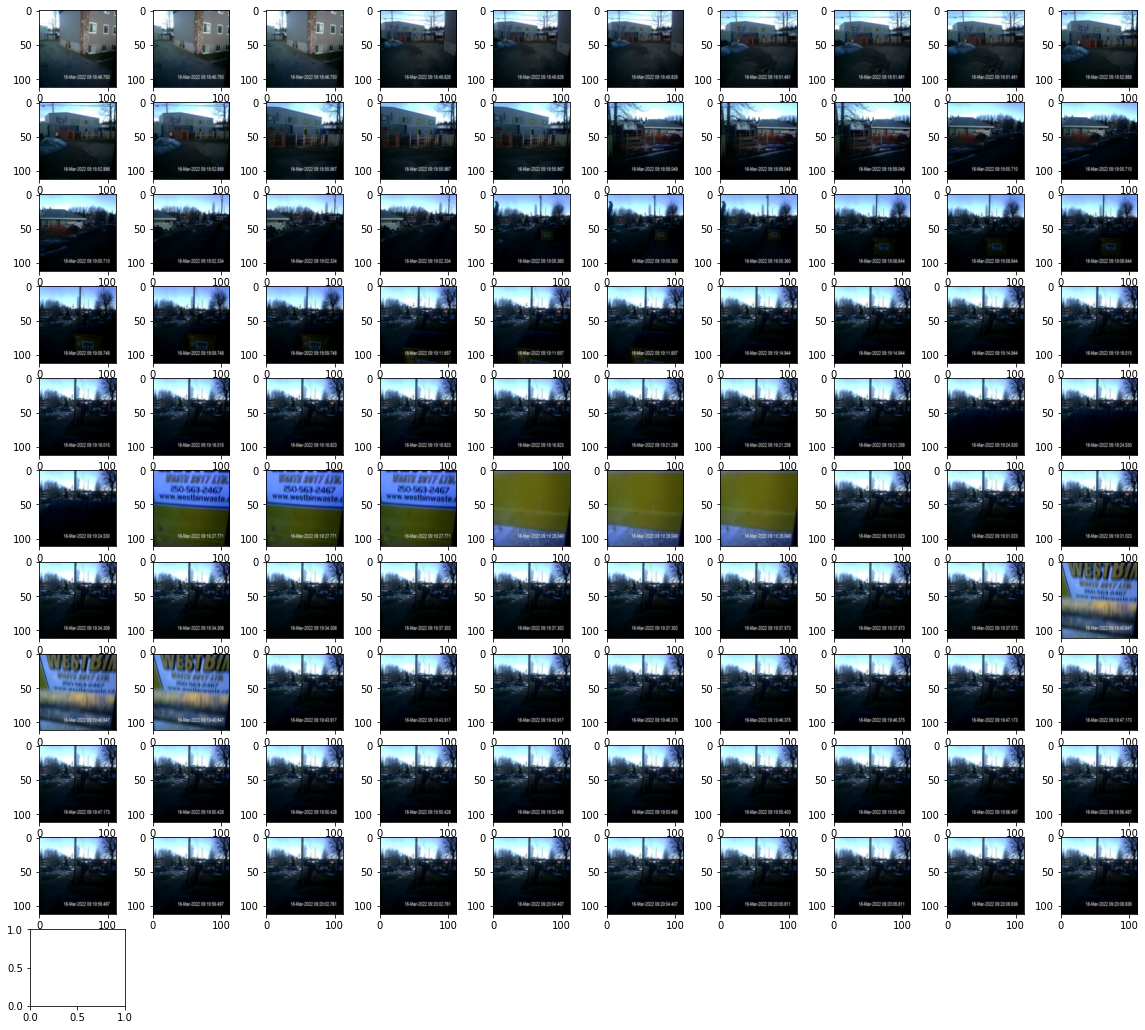

In [ ]:
# Visualize the sequence of one incident
row =10
col =10
for i in range(0,len(features_test[15]), row*col):
  fig =plt.figure(figsize=(20,20)) 
  for j in range(0,row*col):
    fig.add_subplot(row, col,j+1)  
    plt.imshow(features_test[15][i+j])
  plt.show()

## Function for plotting Training and validation Loss & Accuracy 

In [ ]:
def plot_metric_acc(model_training_history, metric_name_1, metric_name_2, plot_name): # function defined for plotting the mterics
    metric_value_1 = model_training_history.history[metric_name_1] # accuracy on training data
    metric_value_2 = model_training_history.history[metric_name_2] # accuracy on validation data
    epochs = range(len(metric_value_1)) #number of epochs considered in training
    plt.plot(epochs, metric_value_1, 'blue', label = metric_name_1) #plot the metrics
    plt.plot(epochs, metric_value_2, 'red', label = metric_name_2) #plot the metrics
    plt.ylabel('Accuracy') #specify the y axis
    plt.xlabel('Number of Epochs') #specify the x axis
    plt.title(str(plot_name))
    plt.legend() # legend to identify the colors

In [ ]:
def plot_metric_loss(model_training_history, metric_name_1, metric_name_2, plot_name):
    metric_value_1 = model_training_history.history[metric_name_1] # loss on training data
    metric_value_2 = model_training_history.history[metric_name_2] # loss on validation data
    epochs = range(len(metric_value_1))  #number of epochs considered in training
    plt.plot(epochs, metric_value_1, 'blue', label = metric_name_1)  #plot the metrics
    plt.plot(epochs, metric_value_2, 'red', label = metric_name_2)  #plot the metrics
    plt.ylabel('Loss') #specify the y axis
    plt.xlabel('Number of Epochs') #specify the x axis
    plt.title(str(plot_name))
    plt.legend() # legend to identify the colors

## Function for Evaluating on test data

In [ ]:
def model_metrics_report(modelname, features_test,labels_test): #define the function for evaluating test data
    y_pred_ohe = modelname.predict(features_test)  # perform predictions on test data
    # Get the index of class with highest probability.
    predicted_label = np.argmax(y_pred_ohe,axis=1)
    # Convert the sigmoid function probabilities to labels
    cm = metrics.confusion_matrix(y_true=labels_test, y_pred=predicted_label)  # create the confusion matrix 
    cm_df = pd.DataFrame(cm,
                        index = ['Good Incidents','Bad Incidents','No Incidents'], 
                        columns = ['Good Incidents','Bad Incidents','No Incidents'])
    plt.figure(figsize=(10,8))
    sns.heatmap(cm_df, annot=True) # create the heatmap showing confusion matrix
    plt.xlabel('Predicted Class labels',fontsize = 20)
    plt.ylabel('Actual Class labels' ,fontsize = 20)
    plt.title("Confusion Matrix for Test Data Predictions",fontsize = 20)
    print ('Confusion Matrix :')
    print(cm)
    print ('Test Accuracy Score :',accuracy_score(labels_test, predicted_label))
    print('Classification Report ') 
    print (classification_report(labels_test, predicted_label)) # print the claiification report

# **Buidling the Model Architecture**

# **1. LRCN Approach with traditonal CNN+LSTM**

In [ ]:
def create_LRCN_model():
    '''
    This function will construct the required LRCN model.
    Returns:
        model: It is the required constructed LRCN model.
    '''

    # We will use a Sequential model for model construction.
    model = Sequential()
    
    # Define the Model Architecture.
    ########################################################################################################################
    
    model.add(TimeDistributed(Conv2D(16, (3, 3), padding='same',activation = 'relu'),
                              input_shape = (SEQUENCE_LENGTH, IMAGE_HEIGHT, IMAGE_WIDTH, num_channels)))
    model.add(TimeDistributed(MaxPooling2D((4, 4)))) 
    model.add(TimeDistributed(Dropout(0.4)))
    
    model.add(TimeDistributed(Conv2D(32, (3, 3), padding='same',activation = 'relu')))
    model.add(TimeDistributed(MaxPooling2D((4, 4))))
    model.add(TimeDistributed(Dropout(0.4)))
    
    
    model.add(TimeDistributed(Conv2D(64, (3, 3), padding='same',activation = 'relu')))
    model.add(TimeDistributed(MaxPooling2D((2, 2))))
    model.add(TimeDistributed(Dropout(0.4)))
    
    model.add(TimeDistributed(Conv2D(32, (2, 2),padding='same',activation = 'relu')))
    model.add(TimeDistributed(MaxPooling2D((2, 2))))
    model.add(TimeDistributed(Dropout(0.4)))
                                      
    model.add(TimeDistributed(Flatten()))
                                      
    model.add(LSTM(128))

    model.add(Dropout(0.4))                               
    model.add(Dense(3, activation = 'softmax'))

    ########################################################################################################################

    # Display the models summary.
    model.summary()
    
    # Return the constructed LRCN model.
    return model

In [ ]:
LRCN_model = create_LRCN_model()
print("Model Created Successfully!")

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 time_distributed_3 (TimeDis  (None, 100, 112, 112, 16  448      
 tributed)                   )                                   
                                                                 
 time_distributed_4 (TimeDis  (None, 100, 28, 28, 16)  0         
 tributed)                                                       
                                                                 
 time_distributed_5 (TimeDis  (None, 100, 28, 28, 16)  0         
 tributed)                                                       
                                                                 
 time_distributed_6 (TimeDis  (None, 100, 28, 28, 32)  4640      
 tributed)                                                       
                                                                 
 time_distributed_7 (TimeDis  (None, 100, 7, 7, 32)   

In [ ]:
early_stopping_callback = EarlyStopping(monitor = 'val_loss', patience = 15, mode = 'min', restore_best_weights = True)
learning_rate_reduction = ReduceLROnPlateau(monitor = 'val_accuracy',patience = 15,verbose = 1,factor = 0.6,min_lr = 0.1)
LRCN_model.compile(loss="SparseCategoricalCrossentropy", optimizer = 'Adam', metrics = ["accuracy"])

LRCN_model_training_history = LRCN_model.fit(x = features_train, y = labels_train, epochs = 100, batch_size = 4,
                                             shuffle = True, validation_data=(features_val,labels_val), 
                                             callbacks = [early_stopping_callback,learning_rate_reduction])

Epoch 1/100
94/94 [==============================] - 8s 53ms/step - loss: 1.0092 - accuracy: 0.4335 - val_loss: 0.9640 - val_accuracy: 0.5426 - lr: 0.0010
Epoch 2/100
94/94 [==============================] - 4s 39ms/step - loss: 0.9755 - accuracy: 0.4441 - val_loss: 0.9587 - val_accuracy: 0.3936 - lr: 0.0010
Epoch 3/100
94/94 [==============================] - 4s 39ms/step - loss: 0.9492 - accuracy: 0.4867 - val_loss: 0.9306 - val_accuracy: 0.5638 - lr: 0.0010
Epoch 4/100
94/94 [==============================] - 4s 39ms/step - loss: 0.9865 - accuracy: 0.4441 - val_loss: 0.9902 - val_accuracy: 0.3298 - lr: 0.0010
Epoch 5/100
94/94 [==============================] - 4s 39ms/step - loss: 0.9511 - accuracy: 0.4814 - val_loss: 0.9648 - val_accuracy: 0.5638 - lr: 0.0010
Epoch 6/100
94/94 [==============================] - 4s 38ms/step - loss: 0.9588 - accuracy: 0.4814 - val_loss: 0.9337 - val_accuracy: 0.5638 - lr: 0.0010
Epoch 7/100
94/94 [==============================] - 4s 39ms/step - lo

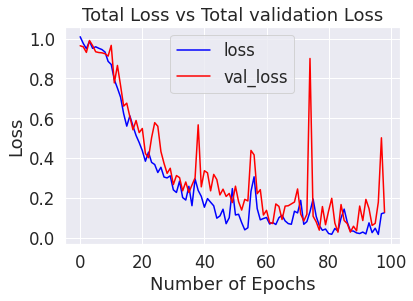

In [ ]:
plot_metric_loss(LRCN_model_training_history, 'loss', 'val_loss', 'Total Loss vs Total validation Loss')

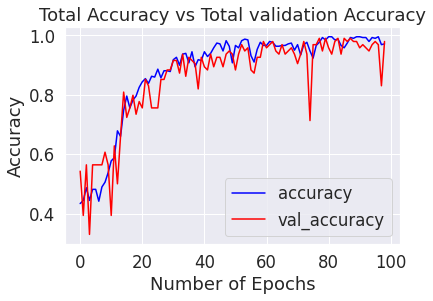

In [ ]:
plot_metric_acc(LRCN_model_training_history, 'accuracy', 'val_accuracy', 'Total Accuracy vs Total validation Accuracy')

In [ ]:
model_evaluation_history = LRCN_model.evaluate(features_test, labels_test)

1/1 [==============================] - 1s 560ms/step - loss: 0.5290 - accuracy: 0.9200


Confusion Matrix :
[[10  0  0]
 [ 1  9  0]
 [ 1  0  4]]
Test Accuracy Score : 0.92
Classification Report 
              precision    recall  f1-score   support

           0       0.83      1.00      0.91        10
           1       1.00      0.90      0.95        10
           2       1.00      0.80      0.89         5

    accuracy                           0.92        25
   macro avg       0.94      0.90      0.92        25
weighted avg       0.93      0.92      0.92        25



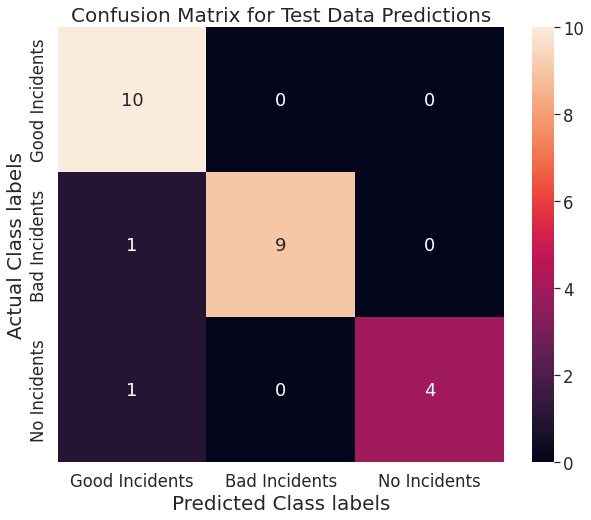

In [ ]:
model_metrics_report(LRCN_model, features_test,labels_test)

# **2.CONV3D Model**

In [ ]:
#def CONV3D_model_train(): 
model = Sequential()
model.add(Conv3D(16, kernel_size=(3, 3, 3), activation='relu', 
                     kernel_initializer='glorot_uniform',padding='same', input_shape=(SEQUENCE_LENGTH, IMAGE_HEIGHT, IMAGE_WIDTH, num_channels)))
model.add(MaxPooling3D(pool_size=(2, 2, 2)))
#model.add(TimeDistributed(BatchNormalization()))
model.add(TimeDistributed(Dropout(0.2)))
model.add(Conv3D(32, kernel_size=(3, 3, 3),padding='same', activation='relu', kernel_initializer='glorot_uniform'))
model.add(MaxPooling3D(pool_size=(2, 2, 2)))
#model.add(TimeDistributed(BatchNormalization()))
model.add(TimeDistributed(Dropout(0.2)))
model.add(Conv3D(64, kernel_size=(3, 3, 3),padding='same', activation='relu', kernel_initializer='glorot_uniform'))
model.add(MaxPooling3D(pool_size=(2, 2, 2)))
#model.add(TimeDistributed(BatchNormalization()))
model.add(TimeDistributed(Dropout(0.2)))
model.add(Conv3D(16, kernel_size=(3, 3, 3),padding='same', activation='relu', kernel_initializer='glorot_uniform'))
model.add(GlobalAveragePooling3D())
#model.add(MaxPooling3D(pool_size=(2, 2, 2)))
#model.add(TimeDistributed(BatchNormalization()))
#model.add(TimeDistributed(Dropout(0.4)))
model.add(Flatten())
model.add(Dense(32, activation='relu', kernel_initializer='glorot_uniform'))
model.add(Dropout(0.2))
model.add(Dense(32, activation='relu', kernel_initializer='glorot_uniform'))
model.add(Dropout(0.2))
model.add(Dense(3, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv3d (Conv3D)             (None, 100, 112, 112, 16  1312      
                             )                                   
                                                                 
 max_pooling3d (MaxPooling3D  (None, 50, 56, 56, 16)   0         
 )                                                               
                                                                 
 time_distributed (TimeDistr  (None, 50, 56, 56, 16)   0         
 ibuted)                                                         
                                                                 
 conv3d_1 (Conv3D)           (None, 50, 56, 56, 32)    13856     
                                                                 
 max_pooling3d_1 (MaxPooling  (None, 25, 28, 28, 32)   0         
 3D)                                                    

In [ ]:
# Compile the model
early_stopping_callback = EarlyStopping(monitor = 'val_loss', patience = 15, mode = 'min', restore_best_weights = True)
learning_rate_reduction = ReduceLROnPlateau(monitor = 'val_accuracy',patience = 2,verbose = 1,factor = 0.6,min_lr = 0.01)
model.compile(loss = "SparseCategoricalCrossentropy", optimizer = 'Adam', metrics = ["accuracy"])
# Fit data to model
model.training_history = model.fit(x = features_train, y = labels_train,batch_size=4,epochs=200,verbose=1,shuffle=True,
                                          validation_data =(features_val,labels_val),
                                          callbacks = [early_stopping_callback,learning_rate_reduction])

Epoch 1/200
94/94 [==============================] - 21s 90ms/step - loss: 1.0055 - accuracy: 0.4574 - val_loss: 0.9555 - val_accuracy: 0.5638 - lr: 0.0010
Epoch 2/200
94/94 [==============================] - 7s 73ms/step - loss: 0.9854 - accuracy: 0.4468 - val_loss: 0.9757 - val_accuracy: 0.5638 - lr: 0.0010
Epoch 3/200
94/94 [==============================] - 7s 74ms/step - loss: 0.9606 - accuracy: 0.4548 - val_loss: 0.9577 - val_accuracy: 0.5638 - lr: 0.0010
Epoch 4/200
94/94 [==============================] - 7s 74ms/step - loss: 0.9555 - accuracy: 0.4654 - val_loss: 0.9497 - val_accuracy: 0.5638 - lr: 0.0010
Epoch 5/200
94/94 [==============================] - 7s 73ms/step - loss: 0.9431 - accuracy: 0.4548 - val_loss: 0.9594 - val_accuracy: 0.5638 - lr: 0.0010
Epoch 6/200
94/94 [==============================] - 7s 73ms/step - loss: 0.9441 - accuracy: 0.4787 - val_loss: 0.9326 - val_accuracy: 0.5638 - lr: 0.0010
Epoch 7/200
94/94 [==============================] - 7s 73ms/step - l

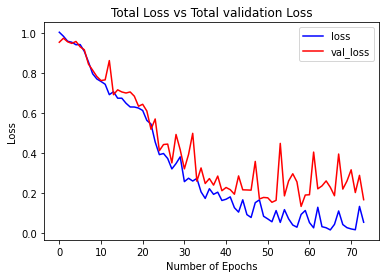

In [ ]:
plot_metric_loss(model.training_history, 'loss', 'val_loss', 'Total Loss vs Total validation Loss')

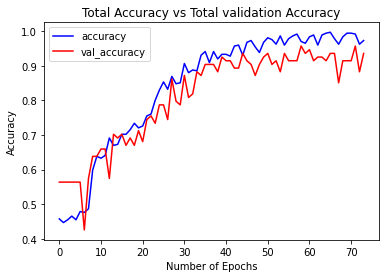

In [ ]:
plot_metric_acc(model.training_history, 'accuracy', 'val_accuracy', 'Total Accuracy vs Total validation Accuracy')

In [ ]:
model_evaluation_history = model.evaluate(features_test, labels_test)

1/1 [==============================] - 1s 637ms/step - loss: 0.1204 - accuracy: 0.9600


Confusion Matrix :
[[ 9  1  0]
 [ 0 10  0]
 [ 0  0  5]]
Test Accuracy Score : 0.96
Classification Report 
              precision    recall  f1-score   support

           0       1.00      0.90      0.95        10
           1       0.91      1.00      0.95        10
           2       1.00      1.00      1.00         5

    accuracy                           0.96        25
   macro avg       0.97      0.97      0.97        25
weighted avg       0.96      0.96      0.96        25



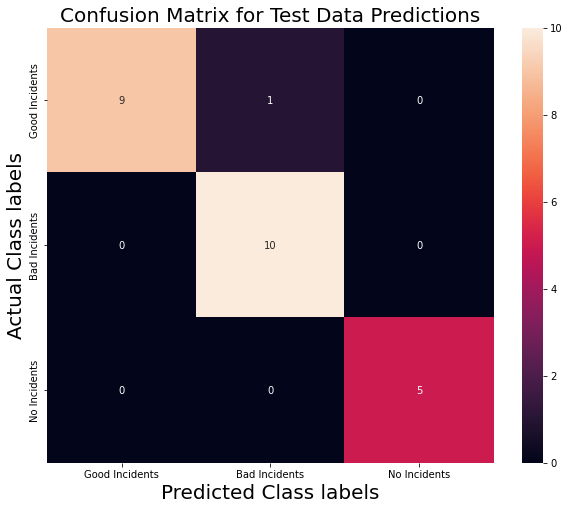

In [ ]:
model_metrics_report(model, features_test,labels_test)

1. **True Positive (TP)** : Actual label : True and Predicted label : True

If the Incidents are good and model predicts them as good then they are called as TP.

Model(LRCN Architecture): 

From the confusion matrix, **9 Incidents** were predicted as **Good Incidents** by the model out of **10 Good Incidents**.

(Ref Fig Notations : Actual label : 1 & Predicted label : 1)

2. **True Negative (TN)** : Actual label : False and Predict label : False

If the Incidents are bad and model predicts them as bad then they are called as TN.

Model(LRCN Architecture): 

Almost predicts the bad incidents. From the confusion matrix, **8 Bad Incidents** were predicted as bad incidents by the model out of **10 Good Incidents**.

(Ref Fig Notations : Actual label : 0 & Predicted label : 0)

3. **False Positive (FP)** : Actual label : False and Predict label : True

If the Incidents are bad and model predicts them as good then they are called as FP.

Model(LRCN Architecture): 

From the confusion matrix, **2 Bad Incidents** was predicted as good incident by the model although they were not the good incidents. FP is also called a TYPE I error. 

(Ref Fig Notations : Actual label : 0 & Predicted label : 1)

4. **False Negative (FN)** : Actual label : True and Predict label : False

If the Incidents are good and model predicts them as bad then they are called as FN.

Model(Conv3D Architecture):
From the confusion matrix, **1 Good Incident** was predicted as bad incident by the model. FP is also called a TYPE II error. 

Currently we are not manking that error.

(Ref Fig Notations : Actual label : 1 & Predicted label : 0)

## **1. Accuracy score:**

Accuracy Score = TP+TN/(TP+TN+FP+FN)

Accuracy means that how many incidents are correctly classified out of all given incidents

Model Accuracy value of 88% means that out of 25 incidents actually 22 incidents are correct.

## **2. Precision Score:**

Precsion score tells you that out of all predicted good incidents, what percentage of incidents are good incidents.

Precsion Score = TP/(TP+FP)

Precision value of 82% means that out of 10 predicted good incidents actually 9 incidents are only correct.


## **3. Recall Score:**

Recall score tells you that out of all good incidents, what percentage of incidents are actually good incidents.

Recall Score = TP/(TP+FN)

Recall value of 80% means we had actual 9 good incidents.

# **Save the Best Model**

In [ ]:
# Get the loss and accuracy from model_evaluation_history.
model_evaluation_loss, model_evaluation_accuracy = model_evaluation_history

# Define the string date format.
# Get the current Date and Time in a DateTime Object.
# Convert the DateTime object to string according to the style mentioned in date_time_format string.
date_time_format = '%Y_%m_%d__%H_%M_%S'
current_date_time_dt = dt.datetime.now()
current_date_time_string = dt.datetime.strftime(current_date_time_dt, date_time_format)
    
# Define a useful name for our model to make it easy for us while navigating through multiple saved models.
trained_model_LRCN = f'model___Date_Time_{current_date_time_string}___Loss_{model_evaluation_loss}___Accuracy_{model_evaluation_accuracy}.h5'

# Save the Model.
LRCN_model.save(trained_model_LRCN)

# **Real-Time Continuous Images Incident Classification**

In [ ]:
# Mounting the GoogleColab ipynb file and Google drive to access the imagedata 
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### **Reading from the folder: 'Continuous Running Time'**

In [ ]:
path ='/content/drive/My Drive/train later/Continuous Running Time/Front Camera' 
os.chdir(path)
print(os.getcwd())

/content/drive/MyDrive/train later/Continuous Running Time/Front Camera


### **Reading the JSON file for velocity data of the vehicle**
**Consider the velocity under 10km per hour**

In [ ]:
import json
with open('/content/drive/MyDrive/train later/velocity_truck.json', 'r') as f:
  speed_data = json.load(f)
df= pd.DataFrame(speed_data)
df=df[df.Speed <'10.00']

In [ ]:
speed_cut_off = 5.0
minimum_images = 15

## **Image reading and preprocessing**

In [ ]:
#from threading import Event
#from numpy.ma.core import asarray

###########################################################################################################
#Read the images and store all of them in a list by extracting the time and also sort them by time, if incase they are misplaced. 
predictor =[]
predicted_class_name=[]
images_queue=[]
test_to_sort=[]
image_reader=[]
for imagename in glob.glob(os.path.join(path, '*.jpg')): # iterate over the  jpg files in the folder
    img_name1=os.path.basename(imagename)  #take the file name using the path data
    img_name=str(os.path.splitext(img_name1)[0]) # elimniate the extension
    img_name=img_name.replace("T", " ") #make the string numerical
    img_name=img_name[:4] + "/" + img_name[4:6] +"/" + img_name[6:8] + " " + img_name[9:11] +":" + img_name[11:13] + ":" + img_name[13:15] #arrange the file name to replicate as date
    img_time=pd.to_datetime(img_name) #to convert the data into datetimeformat
    test_to_sort.append({ "convertedDate" :img_time, "Filename":img_name1,"path_name":imagename}) #store the date&time and path of the file in the dictionary of a defined list
    sorted_list = sorted(test_to_sort, key=lambda d: d['convertedDate']) # sort and stoe the list as per the date&time

############################################################################################################
#combine contious image file list with velocity data list when both have file name in common   
filename_to_speed = {dct['Filename'] : dct['Speed'] for dct in speed_data}
list_new = []
for dct in sorted_list:
    if dct['Filename'] in filename_to_speed:
        dct['Speed'] = filename_to_speed[dct['Filename']]
    else:
        dct['Speed'] = None
    list_new.append(dct)

############################################################################################################
# create clips/trims/slices of incidents when vehicle drops the speed below given km/hour and goes above given km/hour   
sublists = [[]]
for row in list_new:
    if float(row['Speed']) >= speed_cut_off:
        if sublists[-1]:
            sublists.append( [] )
    else:
        sublists[-1].append( row )
if not sublists[-1]:
    sublists.pop()

#############################################################################################################
#filter out small clips if the number of images in the clips are lesser than 15 (assuming to complete a activty we need minimum 15 images)
sequences_now = [x for x in sublists if len(x)>minimum_images]

#############################################################################################################
#now filter out each clips that are having more than 100 images, so that it will contain the image number can be reduced
n=[]
for clip in sequences_now:
  if(len(clip)>SEQUENCE_LENGTH):
      m = [im for im in clip if float(im['Speed'])<=2.5]
      n.append(m)
  else:
      n.append(clip)

############################################################################################################# 
#  Fixing sequence length at the file level
final_lists =[]
for incident in n: # loop over the each clip
    position_count=0
    for dct in incident:
      dct['position'] = position_count
      position_count=position_count+1
    if(len(incident)<SEQUENCE_LENGTH): # if incident is lesser than 100 images, then repeat first few elements to get the sequence 1,1,2,2,3,3,....8,9,10
      lst_quick=[]
      while(len(lst_quick)<SEQUENCE_LENGTH):
        count=0
        for s in range(len(incident)):
          if(len(lst_quick)<SEQUENCE_LENGTH):
            g=count+s
            lst_quick.insert(g, incident[g])
          else:
            break
        count=len(lst_quick)
      my_lst_now=sorted(lst_quick, key=lambda x: x['position'], reverse=False)
    else:
      my_lst_now=incident
    #print(lst_quick)
    #print(len(lst_quick)))      
    final_lists.append(my_lst_now) 

##################################################################################################################
#Now pass the clips to make it array of images for predictions
for activity in final_lists: # loop over the each clip
    image_reader=[]
    for event in activity: # loop over  within a clip to reacd the images
        a=event['path_name'] # pull out the path to read it
        #print(a)
        img = load_img(a, color_mode = "rgb", target_size=(IMAGE_HEIGHT,IMAGE_WIDTH), interpolation='bilinear')
        image_array = img_to_array(img)
        #sharp_img = cv2.createBackgroundSubtractorMOG2().apply(image_array)
        normalized_img = image_array/255  #Normalise the image array vaules between 0's and 1's
        image_reader.append(normalized_img)

##############################################   
    #Fixixng the sequence length at image level for more than 100 images in the incident
    diff= abs(SEQUENCE_LENGTH-len(image_reader)) # find whether length is greater/lesser than defined sequence     
    incident_seq_images_data = [] # initialize the list to hold the final sequence of the incident
    if len(image_reader) > SEQUENCE_LENGTH:  # check if the length of the sequence > than defined sequence length
        #truncate the initial images or final images till the differnce value 
        if (diff % 2) == 0:
          k=diff/2
          k=int(k)
          del image_reader[-k:]
          del image_reader[0:k]
        else:
          k=diff/2
          s=math.floor(k)
          s=int(s)
          w=math.ceil(k)
          w=int(w)
          del image_reader[-s:]
          del image_reader[0:w]
        incident_seq_images_data = image_reader # store the final sequence now
    elif len(image_reader) < SEQUENCE_LENGTH: #check if the length of the sequence < than defined sequence length
            for ai in range(diff): # use forloop and insert the first image till the absolute differnce value 
              image_reader.insert(0,normalized_img_pad)
            incident_seq_images_data = image_reader # store the final sequence now
    else:  
            incident_seq_images_data = image_reader #else store the final sequence now
    predictor.append(incident_seq_images_data)
#################################################   
predictor =np.array(predictor)


# **Predictions**

In [ ]:
##################################################################################################
# Pass the all sequences with 100 image sequence in each sequence to the model and get the predicted probabilities.
predicted_label_probability = LRCN_model.predict(predictor)
# Get the index of class with highest probability.
predicted_label = np.argmax(predicted_label_probability,axis=1)
#################################################################################################

# **Results**

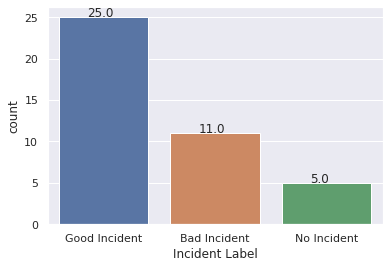

In [ ]:
#######################################################################################
#Get data for report and visulization
predicted_incidnet=[]
predicted_incidnet=predicted_label.tolist()
start_t=[]
end_t=[]
start_img=[]
end_img=[]
im_count=[]
totl_time=[]
for trim in n:
    im_count.append(len(trim))
    start_trim=trim[0]
    start_t.append(start_trim['convertedDate'])
    start_img.append(start_trim['Filename'])
    end_trim=trim[-1]
    end_t.append(end_trim['convertedDate'])
    end_img.append(end_trim['Filename'])
    totl_time.append(str(end_trim['convertedDate']-start_trim['convertedDate']))

####################################################################################
#conver the results into dataframe
my_incidents = pd.DataFrame(
    {'Incident Start Time': start_t,
     'Incident Start Image': start_img,
     'Incident End Time': end_t,
     'Incident End Image': end_img,
     'Total Incident Images': im_count,
     'Time Taken(in minutes)': totl_time,
     'Predicted_Incident' : predicted_incidnet
    })

my_incidents['Incident Label'] = my_incidents['Predicted_Incident'].map({1:'Good Incident',0:'Bad Incident',2:'No Incident'})
####################################################################################
# Convert datframe to Excel and Generate report    
doc_name = 'Bin_lift_record.xlsx'
my_incidents.to_excel(doc_name)

######################################################################################
# Visualization of predicted incidents in the continuous running time image dataset
sns.set(font_scale=1.0)
ax = sns.countplot(x="Incident Label", data=my_incidents)
for p in ax.patches:
   ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))

#my_incidents['Predicted_Incident'].value_counts().plot(kind='bar',color=['green','lightblue','yellow'], figsize=(7, 6), rot=0)
#plt.show()
#plt.ylabel("Incident Count")
#plt.xlabel("Incidents")
#plt.title("Predicted incidents on the 'Continuous Running Time'")
######################################################################################

In [ ]:
my_incidents

,Incident Start Time,Incident Start Image,Incident End Time,Incident End Image,Total Incident Images,Time Taken(in minutes),Predicted_Incident,Incident Label
0,2021-10-04 10:24:00,20211004T102400622.jpg,2021-10-04 10:26:39,20211004T102639717.jpg,68,0 days 00:02:39,1,Good Incident
1,2021-10-04 10:28:32,20211004T102832813.jpg,2021-10-04 10:33:32,20211004T103332910.jpg,108,0 days 00:05:00,1,Good Incident
2,2021-10-04 10:36:18,20211004T103618144.jpg,2021-10-04 10:37:00,20211004T103700990.jpg,19,0 days 00:00:42,0,Bad Incident
3,2021-10-04 10:39:49,20211004T103949267.jpg,2021-10-04 10:45:13,20211004T104513733.jpg,132,0 days 00:05:24,1,Good Incident
4,2021-10-04 10:47:52,20211004T104752872.jpg,2021-10-04 10:51:24,20211004T105124062.jpg,87,0 days 00:03:32,1,Good Incident
5,2021-10-04 10:51:51,20211004T105151634.jpg,2021-10-04 10:53:57,20211004T105357168.jpg,55,0 days 00:02:06,1,Good Incident
6,2021-10-04 10:58:11,20211004T105811353.jpg,2021-10-04 11:00:53,20211004T110053730.jpg,70,0 days 00:02:42,1,Good Incident
7,2021-10-04 11:04:15,20211004T110415686.jpg,2021-10-04 11:07:28,20211004T110728454.jpg,82,0 days 00:03:13,1,Good Incident
8,2021-10-04 11:11:27,20211004T111127184.jpg,2021-10-04 11:14:43,20211004T111443097.jpg,84,0 days 00:03:16,1,Good Incident
9,2021-10-04 11:15:01,20211004T111501458.jpg,2021-10-04 11:16:45,20211004T111645405.jpg,46,0 days 00:01:44,1,Good Incident


# **Conclusion**

The Model is able to predict on Realtime Continuous Image Flow.

The project also gives the complete report on the following
1. Start Time of the Incidnet,
2. End Time of the Incident, 
3. Total Time taken by the truck operators to complete the incident
4. Number of images taken during the Incident Execution
5. The Kind of incident took place (predicted by the model)



In [ ]:
%%shell
jupyter nbconvert --to html /content/Capstone_Project.ipynb